**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


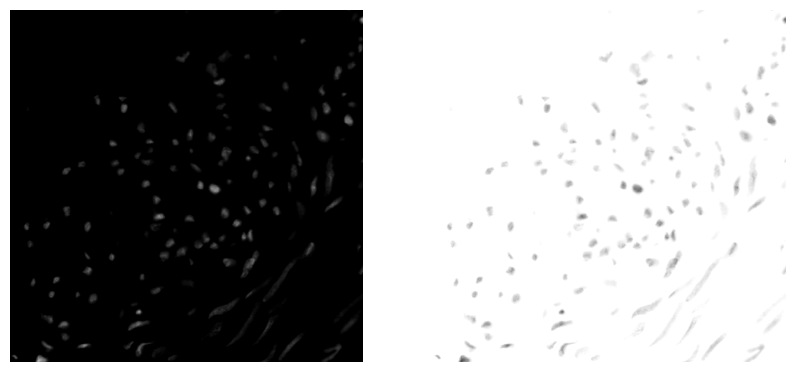

In [7]:
# code here
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
#plt.imshow(img, cmap='gray', vmin=0, vmax=255)

negativeImg = 255- img;

cv2.imwrite("negative_im_cells.png", negativeImg)

im = cv2.imread("negative_im_cells.png", cv2.IMREAD_GRAYSCALE)


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].axis('off')  # Hide axes


axs[1].imshow(im, cmap='gray', vmin=0, vmax=255)
axs[1].axis('off')  # Hide axes

plt.show()
#Ao meu ver, a imagem negativa fornece uma melhor visão devido à cor do bakcground ser mais clara,
#destacando assim as células





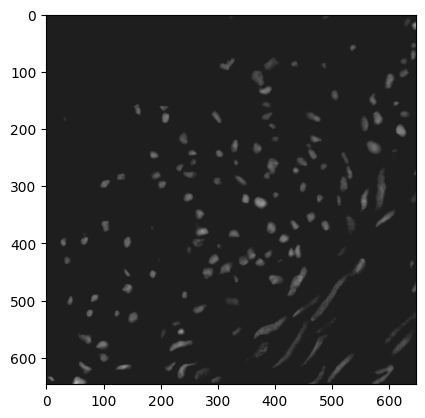

In [16]:
#Gerando a imagem através de sua negativa
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
negativeImg = cv2.imread("negative_im_cells.png", cv2.IMREAD_GRAYSCALE)
negativeToNormalImg = 255 - negativeImg

plt.imsave("negative_to_normal_Img.png", negativeToNormalImg)
newImg = cv2.imread("negative_to_normal_Img.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(newImg,  cmap='gray', vmin=0, vmax=255)


2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



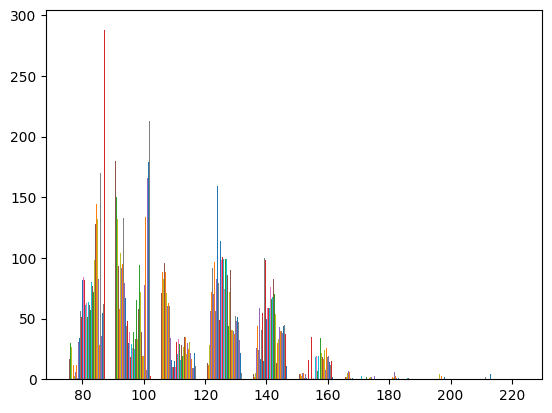

In [44]:
# code here

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

plt.hist(img)
plt.show()

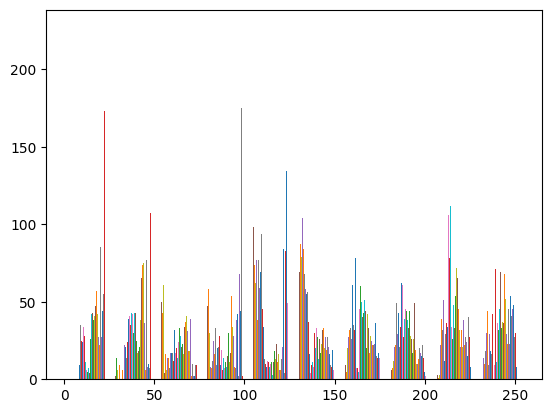

In [38]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

equ = cv2.equalizeHist(img)

plt.hist(equ)
plt.show()


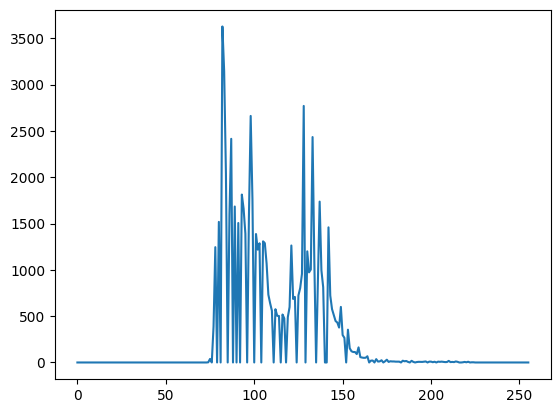

In [1]:
#Nao consegui achar uma função na opencv2 que plote a curva de transformação
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

histog = np.bincount(img.ravel(), minlength=256)  # montando o histograma


prob = histog/np.sum(histog)

cdf = np.cumsum(prob)

transf = 255 * cdf

plt.plot(transf, color='b')

plt.title('Curva de Transformação')
plt.ylabel('Sk')
plt.xlabel('Rk')

#plt.show()


3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

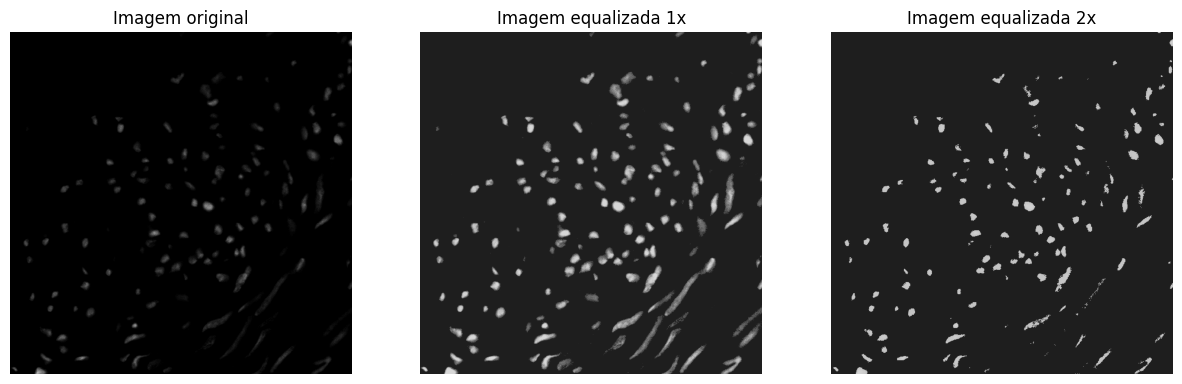

In [1]:
# code here

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

#numero ideal de pixels em cada nivel: l = (n x m)/L
# Como estão sendo usados 8 bits para representar a imagem, então há 2^8 niveis de cinza => 256 niveis

histog = np.bincount(img.ravel(), minlength=256)  # montando o histograma

#probabilidade 
prob = histog/np.sum(histog)

#acumulada (cdf = Cumulative Distribuition Function)
cdf = np.cumsum(prob)

#transformacao
equ = np.ceil(cdf * 255)

newImg = img

#aplica a primeira vez na imagem
newImg = equ[img] 
#EQUIVALENTE A:
 #for i in range(img.shape[0]):
  #      for column in j(img.shape[1]):
  #         img[i, j] = newImg[int(img[i, j])]
  
readEqu1x = cv2.imread("equalized1x.png", cv2.IMREAD_GRAYSCALE)

newImg2 = newImg.copy()
histog2 = np.bincount(readEqu1x.ravel(), minlength=256) #histograma da imagem já equalizada

prob2 = histog2/np.sum(histog2)

cdf2 = np.cumsum(prob2)

equ2 = np.ceil(cdf2  * 255)

newImg2 = equ2[img]

plt.imsave("equalized2x.png", newImg2)

readEqu2x = cv2.imread("equalized2x.png", cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1).set_title("Imagem original")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2).set_title("Imagem equalizada 1x")
plt.imshow(readEqu1x, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3).set_title("Imagem equalizada 2x")
plt.imshow(readEqu2x, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

